In [76]:
import os 
import cv2
import PIL
import torch
import numpy as np
from PIL import Image
import torchvision
from torchvision.utils import flow_to_image


In [96]:
path = './output/market1/'
f01 = torch.tensor(np.load(path+'flow01.npy')).permute(2,0,1).unsqueeze(0)
f10 = torch.tensor(np.load(path+'flow10.npy')).permute(2,0,1).unsqueeze(0)
ft0gt = torch.tensor(np.load(path+'flowt0gt.npy')).permute(2,0,1).unsqueeze(0)
ft1gt = torch.tensor(np.load(path+'flowt1gt.npy')).permute(2,0,1).unsqueeze(0)
print(f01.shape, f01.mean(), f01.min(), f01.max(), f01.dtype, type(f01))

torch.Size([1, 2, 520, 960]) tensor(-35.6484) tensor(-102.6902) tensor(101.4090) torch.float32 <class 'torch.Tensor'>


In [97]:
def view_flow(flow):
    topilimage = torchvision.transforms.ToPILImage()
    flow_img = flow_to_image(flow)
    flow_img = topilimage(flow_img)
    flow_img = cv2.cvtColor(np.asarray(flow_img), cv2.COLOR_BGR2HSV)
    plt.imshow(flow_img)
    plt.show()

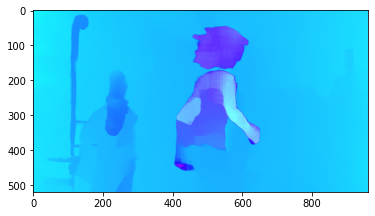

In [143]:
view_flow(f01[0])

In [37]:
ft0_reshape = ft0.reshape(-1,2)
print(ft0_reshape.shape)

(499200, 2)


In [38]:
import math

def calculate_distance(x, y):
    distance = math.sqrt(x**2 + y**2)
    return distance

In [39]:
amplitude = [calculate_distance(ele[0], ele[1]) for ele in ft0_reshape]
len(amplitude)

499200

In [40]:
amp_2d = np.array(amplitude).reshape(520, 960)
print(amp_2d.shape)

(520, 960)


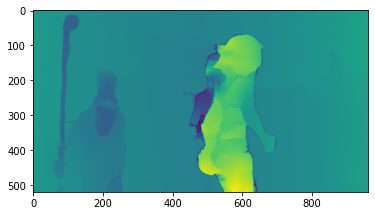

In [41]:
plt.imshow(amp_2d)

In [42]:
amp_2d[amp_2d >= 50] = 1

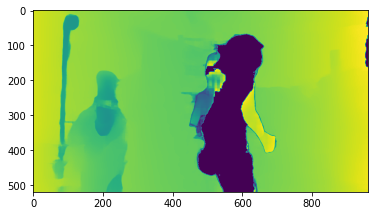

In [43]:
plt.imshow(amp_2d)

In [8]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=10):
    plt.hist(data, bins=bins)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

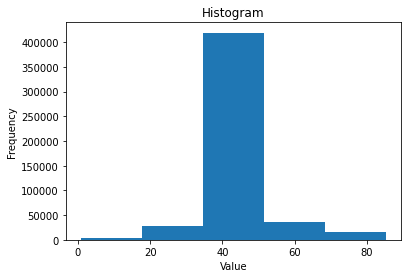

In [9]:
plot_histogram(amplitude, bins=5)

In [15]:
path = './output/glider/'
ft0 = np.load(path+'flowt0.npy')
ft1 = np.load(path+'flowt1.npy')
print(ft0.shape, ft0.mean(), ft0.min(), ft0.max())

(520, 960, 2) -7.04626 -19.679043 11.078632


In [16]:
ft0_reshape = ft0.reshape(-1,2)
print(ft0_reshape.shape)

(499200, 2)


In [17]:
amplitude = [calculate_distance(ele[0], ele[1]) for ele in ft0_reshape]
len(amplitude)

499200

In [18]:
amp_2d = np.array(amplitude).reshape(520, 960)
print(amp_2d.shape)

(520, 960)


In [21]:
amp_2d

array([[17.56269025, 17.62792534, 17.65969322, ..., 15.79229238,
        15.77930851, 15.74992309],
       [17.62064582, 17.65159097, 17.67506331, ..., 15.79567357,
        15.78391689, 15.76284326],
       [17.65444831, 17.666044  , 17.68020142, ..., 15.79814538,
        15.78769172, 15.76649899],
       ...,
       [19.58579451, 19.6027418 , 19.61843882, ..., 17.49458694,
        17.50207643, 17.48938457],
       [19.56602875, 19.59344393, 19.60705642, ..., 17.48633732,
        17.4918218 , 17.48557268],
       [19.52435338, 19.58175779, 19.59529031, ..., 17.48517125,
        17.48951619, 17.48043863]])

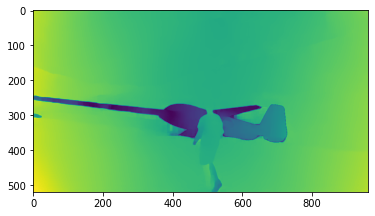

In [20]:
plt.imshow(amp_2d)

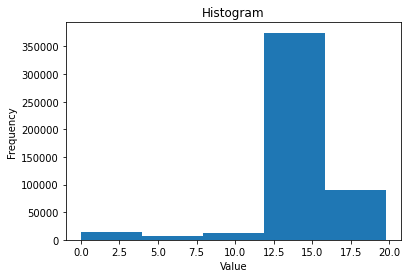

In [19]:
plot_histogram(amplitude, bins=5)